In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [7]:
%matplotlib inline
from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams 

import seaborn as sns

from palmerpenguins import load_penguins

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils


spath = Path("../../../draft/figures/code/")
rcParams['figure.dpi'] = 200

In [8]:
penguins = load_penguins()

In [9]:
dict(penguins.dtypes)

{'species': dtype('O'),
 'island': dtype('O'),
 'bill_length_mm': dtype('float64'),
 'bill_depth_mm': dtype('float64'),
 'flipper_length_mm': dtype('float64'),
 'body_mass_g': dtype('float64'),
 'sex': dtype('O'),
 'year': dtype('int64')}

In [10]:
penguins['species'].value_counts().reset_index()

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [11]:
table = iris.DataFrame(penguins['species'].value_counts().reset_index())

In [12]:
table.view().keys()

Index(['index', 'species'], dtype='object')

In [13]:
fts = {'position':{'name':'index', 
                   'encoder': position.Nominal({'Adelie': 0,  'Chinstrap': 1, 'Gentoo': 2})},  
        'length': {'name': 'species'},
        'facecolors': {'name':'index', 
                       'encoder': color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'})}}

In [14]:
table.view()['index']

0       Adelie
1       Gentoo
2    Chinstrap
Name: index, dtype: object

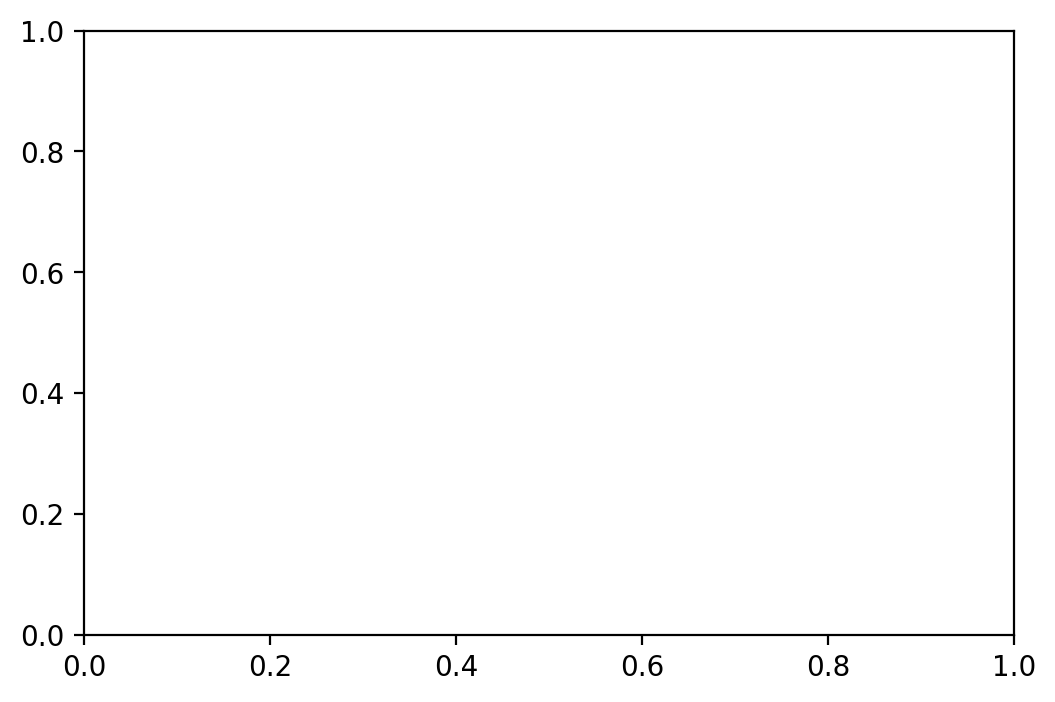

In [15]:
fig, ax = plt.subplots()

artistv = bar.BarArtist(table, fts, orientation='v')


In [31]:
artistv.assemble([1,2,3], [4,5,6])

GraphicCollection(paths=[Path(array([[1. , 0. ],
       [1. , 4. ],
       [1.8, 4. ],
       [1.8, 0. ],
       [1. , 0. ]]), array([ 1,  2,  2,  2, 79], dtype=uint8)), Path(array([[2. , 0. ],
       [2. , 5. ],
       [2.8, 5. ],
       [2.8, 0. ],
       [2. , 0. ]]), array([ 1,  2,  2,  2, 79], dtype=uint8)), Path(array([[3. , 0. ],
       [3. , 6. ],
       [3.8, 6. ],
       [3.8, 0. ],
       [3. , 0. ]]), array([ 1,  2,  2,  2, 79], dtype=uint8))], transforms=[<matplotlib.transforms.IdentityTransform object at 0x00000136754BA520>, <matplotlib.transforms.IdentityTransform object at 0x00000136754BA2B0>, <matplotlib.transforms.IdentityTransform object at 0x00000136754BA070>], offsets=[(0, 0), (0, 0), (0, 0)], offsetTrans=[<matplotlib.transforms.IdentityTransform object at 0x00000136754BACA0>, <matplotlib.transforms.IdentityTransform object at 0x00000136754BAC70>, <matplotlib.transforms.IdentityTransform object at 0x00000136754BAF40>], facecolors=['C0', 'C0', 'C0'], edgecolors=['k'

In [34]:
%debug
fig, ax = plt.subplots()

artistv = bar.BarArtist(table, fts, orientation='v')
ax.add_artist(artistv)
#ax.set(xlim = (-0.5, 3.5), ylim = (0,200),
#       xticks = [.4, 1.4, 2.4],xticklabels = table.view(None)['index'])
#fig.savefig(spath/"bar_v.png",  bbox_inches='tight')

> c:\users\story\anaconda3\envs\mplrelease\lib\site-packages\matplotlib\backends\backend_agg.py(174)draw_path_collection()
    172                 "3.3", message="Support for offset_position='data' is "
    173                 "deprecated since %(since)s and will be removed %(removal)s.")
--> 174         return self._renderer.draw_path_collection(
    175             gc, master_transform, paths, all_transforms, offsets, offsetTrans,
    176             facecolors, edgecolors, linewidths, linestyles, antialiaseds, urls,

> c:\users\story\projects\proposal\code\matplottoy\artists\bar.py(95)draw()
     93         gc = renderer.new_gc()
     94         #offset_position data is deprecated
---> 95         renderer.draw_path_collection(gc, 
     96         master_transform=mtransforms.IdentityTransform(),
     97         paths=graphic.paths,

*** NameError: name 'offsets' is not defined
> c:\users\story\anaconda3\envs\mplrelease\lib\site-packages\matplotlib\image.py(132)_draw_list_compositing

In [ ]:
fig, ax = plt.subplots()

artisth = bar.Bar(table, fts, orientation='horizontal')
ax.add_artist(artisth)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (0,200),
       yticks = [.4, 1.4, 2.4],
       yticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_h.png",  bbox_inches='tight')

# grouped bar

In [ ]:
penguins

In [ ]:
df = penguins.groupby(['island','species']).count()['sex'].reset_index()

In [ ]:
sb = penguins.groupby(['species', 'sex']).count()['year'].reset_index()

In [ ]:
sb.pivot(index=['sex'], columns=['species'], values = 'year').reset_index().plot.bar(stacked=False)

In [ ]:
sb.pivot(index=['sex'], columns=['species'], values = 'year').reset_index().plot.bar(stacked=True)

In [ ]:
sb

In [ ]:
wide_table = sb.pivot(index=['sex'], columns=['species'], values='year').reset_index()
for s in ['Adelie', 'Chinstrap', 'Gentoo']:
    wide_table[f'{s}_c'] = s

In [ ]:
bt = iris.DataFrame(wide_table)

In [ ]:
print(bt.view().to_latex())

In [ ]:
cmap = color.Categorical({'Adelie':'#FF8C00', 'Gentoo':'#159090','Chinstrap':'#A034F0'})
ts = {'position': {'name':'sex',
                    'encoder': position.Nominal({'female':0, 'male':1})}} 
mgts = {'length': {'name': ['Adelie', 'Chinstrap', 'Gentoo']},
        'facecolors': {'name': ['Adelie', 'Chinstrap', 'Gentoo'], 
                       'encoder': cmap}} 
sgts = {'length':{'name': ['Adelie']},
        'facecolors' :{'name':['Adelie'], 'encoder':cmap}}

In [ ]:
group_transforms =  [{'length': {'name':'Adelie'},
                      'facecolors': {'name':"Adelie_c", 'encoder':cmap}},
                     {'length': {'name':'Chinstrap'},
                      'facecolors': {'name':"Chinstrap_c", 'encoder':cmap}}, 
                     {'length': {'name':'Gentoo'},
                      'facecolors': {'name':"Gentoo_c", 'encoder':cmap}}]

In [ ]:
# to do - this should just work
should_do = {'position': {'name':'sex',  'encoder': position.Nominal({'female':0, 'male':1})}, 
      'length': {'name': 'year'},
      'facecolors':{'name': 'species', 'encoder': cmap}}

In [ ]:
fig, ax = plt.subplots()
artistSB = bar.StackedBar(bt, ts, group_transforms)
ax.add_artist(artistSB)
_ = ax.set(ylim = (0, 175), 
       xlim = (-.2, 2),  
        xticks = (.4, 1.4),
        xticklabels = ['female', 'male'],
       xlabel = "")
ax.set_ylabel("# penguins", fontsize=14 )
ax.tick_params(labelsize=12)
fig.savefig(spath/"bar_stacked.png",  bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
artistGB = bar.GroupedBar(bt, ts, group_transforms)
ax.add_artist(artistGB)
_ = ax.set(ylim = (0, 80), 
       xlim = (-.2, 2),  
            xticks = (.4, 1.4),
        xticklabels = ['female', 'male'],
       xlabel = "")
ax.set_ylabel("# penguins", fontsize=14 )
ax.tick_params(labelsize=12)
fig.savefig(spath/"bar_grouped.png",  bbox_inches='tight')

In [ ]:
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.patches as mpatches

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, constrained_layout=True)
for a in artistv._paths:
    path = mpath.Path(a.vertices, a.codes, closed=True)
    patch = mpatches.PathPatch(path)
    ax1.add_patch(patch)
_ = ax1.set(ylim = (0, 160), xlim = (-0.25, 3))
for c, col in zip(artistSB.children, ['C0', 'C1', 'C2']):
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes, closed=True)
        patch = mpatches.PathPatch(path, color=col)
        ax2.add_patch(patch)
_ = ax2.set(ylim = (0, 170), xlim = (-0, 3))
for c, col in zip(artistGB.children, ['C0', 'C1', 'C2']):
    for a in c._paths:
        path = mpath.Path(a.vertices, a.codes, closed=True)
        patch = mpatches.PathPatch(path, color=col)
        ax3.add_patch(patch)
_ = ax3.set(ylim = (0, 170), xlim = (-0, 3))